### 重新執行2-1程式

Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.2854 - accuracy: 0.9167 - val_loss: 0.1460 - val_accuracy: 0.9578
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1170 - accuracy: 0.9648 - val_loss: 0.1135 - val_accuracy: 0.9671
Epoch 3/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0781 - accuracy: 0.9768 - val_loss: 0.0923 - val_accuracy: 0.9743
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9835 - val_loss: 0.0810 - val_accuracy: 0.9770
Epoch 5/5
313/313 [==============================] - 0s 668us/step - loss: 0.0689 - accuracy: 0.9788
acc: 0.9787999987602234


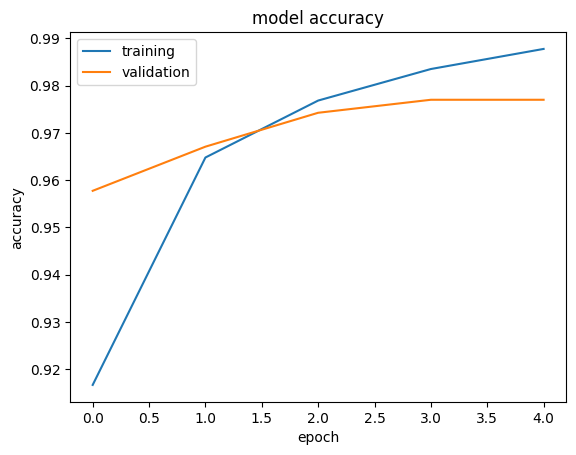

Test loss: 0.0689
Test accuracy: 0.979


In [17]:
# 載入mnist資料集及需要的套件
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 將資料轉換成(60000, 28, 28)變成(60000, 28*28)
train_images = train_images.reshape((60000, 28 * 28))

# 將資料分佈到0-1之間浮點數，原本是0-255，其實算是資料正規化

train_images = train_images.astype("float32") / 255

# 同樣的方式處理測試資料

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# 建立模型

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# 編輯模型
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])

# 訓練模型並記錄訓練過程
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# 評估模型
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"acc: {accuracy}")

# 繪製訓練過程及驗證過程的準確率

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')